In [1]:
!pip install plotly
!pip install numpy
!pip install matplotlib
!pip install statsmodels
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install yellowbrick
!pip install scipy

In [49]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import csv
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

# Transformaciones
En este dataset nos interesa solo las variables cuantitativas por eso se escogieron las columnas que se deseaban
y Sale price que aunque vaya a ser eliminado nos servira para la variable categorica tambien removemos cualquier row con NA.
Procederemos tambien a convertir nuestra variable categorica una vez seteada en un factor

In [21]:
#We get only relevant columns
trainSetGiven = pd.read_csv("data/train.csv")[["SalePrice","LotFrontage","GarageArea","GrLivArea","LotArea","YearRemodAdd", "OverallQual"]]
trainSetGiven.columns

Index(['SalePrice', 'LotFrontage', 'GarageArea', 'GrLivArea', 'LotArea',
       'YearRemodAdd', 'OverallQual'],
      dtype='object')

In [22]:
#Get only numeric
dataSetCompleteNumeric = trainSetGiven._get_numeric_data().dropna(how='any')
lenP = len(dataSetCompleteNumeric['SalePrice'])

dataSetCompleteNumeric

,SalePrice,LotFrontage,GarageArea,GrLivArea,LotArea,YearRemodAdd,OverallQual
0,208500,65.0,548,1710,8450,2003,7
1,181500,80.0,460,1262,9600,1976,6
2,223500,68.0,608,1786,11250,2002,7
3,140000,60.0,642,1717,9550,1970,7
4,250000,84.0,836,2198,14260,2000,8
...,...,...,...,...,...,...,...
1455,175000,62.0,460,1647,7917,2000,6
1456,210000,85.0,500,2073,13175,1988,6
1457,266500,66.0,252,2340,9042,2006,7
1458,142125,68.0,240,1078,9717,1996,5


# Pre procesamiento
Decidimos separar las casas en subconjuntos para determinar su variable categórica que sera la que luego pasaremos a que nos funcione como un factor

In [72]:
# We sperate to get valid sets
caros = dataSetCompleteNumeric[dataSetCompleteNumeric['SalePrice']>150000].copy()
# caros['cat'] = 'Caro'
caros['category'] = "cara"
baratos = dataSetCompleteNumeric[dataSetCompleteNumeric['SalePrice']<80000].copy()
baratos['category'] = "barata"
medio = dataSetCompleteNumeric[dataSetCompleteNumeric['SalePrice'] > 80000].copy()
medio = medio[medio['SalePrice'] < 150000]
medio['category'] = "medio"
medio["category"]

3       medio
5       medio
8       medio
9       medio
10      medio
        ...  
1450    medio
1452    medio
1453    medio
1458    medio
1459    medio
Name: category, Length: 494, dtype: object

In [87]:
#Proporciones caros
trainCaro = caros.sample(frac=0.7)
normalizeC = caros.drop(trainCaro.index)

#Proporciones baratos
trainBarato = baratos.sample(frac=0.7)
normalizeB = baratos.drop(trainBarato.index)

#Proporciones medio
trainMedio = medio.sample(frac=0.7)
normalizeM = medio.drop(trainMedio.index)

# Proporcion 30, 70
normalized  = normalizeC.append(normalizeB).append(normalizeM)

#all data
datos = normalized
datos['category'], _ = pd.factorize(datos['category'], sort=True)
datos.pop("SalePrice")
y = datos.pop("category")
X = datos
y.unique()

array([1, 0, 2])

Arriba lo que hicimos fue solo tomar el 30 de los datos de cada una de las diferentes categorias asi teniamos una muestra pareja para un mejor modelo.

In [75]:
#Plot config
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


# Simple SVM

In [76]:
#Set seeder for random
import random
random.seed(123)

In [77]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

# Entrenando el modelo

In [93]:
from sklearn.metrics import confusion_matrix
import time
svclassifierLinear = svm.SVC(kernel='linear')
timestamp1 = time.time()
svclassifierLinear.fit(X_train, y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en entrenar con un kernel linear" % (timestamp2 - timestamp1))

Se tomo  25.58 segundos en entrenar con un kernel linear


## Realizando predicciones

In [94]:

timestamp1 = time.time()
y_pred = svclassifierLinear.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir" % (timestamp2 - timestamp1))
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para svm con kernel linear\n',cm)
print('Accuracy: ',accuracy)
y_pred

Se tomo  0.00 segundos en predecir
Matriz de confusión para svm con kernel linear
 [[ 3  0  1]
 [ 2 56  1]
 [ 1  4 40]]
Accuracy:  0.9166666666666666


array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0,
       2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2])

# Resultados de SVM con un Kernel Linear
El modelo fue bastante lento para aprender solo se tomo el 30% del data set ya que si se tomaba todo tardaba mucho
Fue preciso tuvo un 91% de acierto

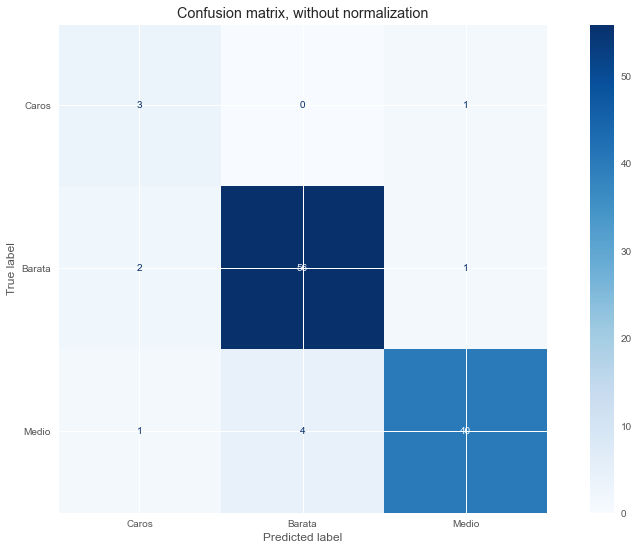

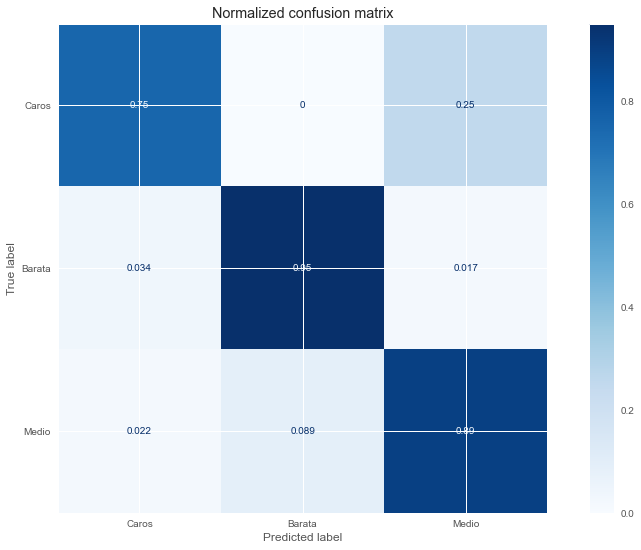

In [95]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svclassifierLinear, X_test, y_test,
                                 display_labels=["Caros", "Barata", "Medio"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

# Interpretacion de las matrices de confusion
Utilizaremos la normalizada para ver nuestros resultados como podemos ver las casas caras fueron las que en porcentaje 
tuvieron menos exito confundiendose con las de medio precio lo cual es logico que si iban a  haber falsos positivos serian 
con ese tipo de casas.
Respecto a las casas baratas vemos que fue casi perfecta su predicción fallo con un 1 porciento de las medias 
y con un 3 porciento de las caras lo cual es un poco raro pero el 96% de las casas fueron acertadas con exito. En este modelo tenemos un rango menor de casas y de precio tiene un limite corto de casas.
Y respecto a las casas medias parece que tambien tuvo un buen % de acierto con 89% confunciendose mas que todo en un 9% aprox con las baratas

# SVM polinomial


## Entrenaremos el modelo

In [80]:
svclassifier = svm.SVC(kernel='poly', degree=75)
timestamp1 = time.time()
svclassifier.fit(X_train, y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en entrenar con un kernel polinomial" % (timestamp2 - timestamp1))

Se tomo  0.00 segundos en entrenar con un kernel polinomial


## Realizando predicciones

In [81]:
timestamp1 = time.time()
y_pred = svclassifier.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir" % (timestamp2 - timestamp1))
cm = confusion_matrix(y_test,y_pred)

Se tomo  0.00 segundos en predecir


In [82]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas con valor barato\n',cm)
print('Accuracy: ',accuracy)
y_test

Matriz de confusión para detectar casas con valor barato
 [[ 0  0  4]
 [ 0 41 18]
 [ 0 16 29]]
Accuracy:  0.6481481481481481


439     2
1303    1
1412    2
737     1
315     1
       ..
585     1
247     2
1438    2
433     1
227     2
Name: category, Length: 108, dtype: int64

# Resultados de SVM con un Kernel polinomial
Este fue mas rapido pero se tuvo una peor prediccion apenas del 64.81% porciento correctos

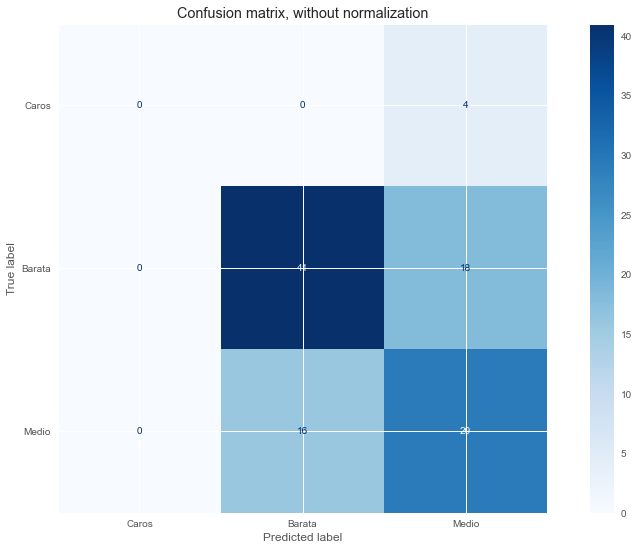

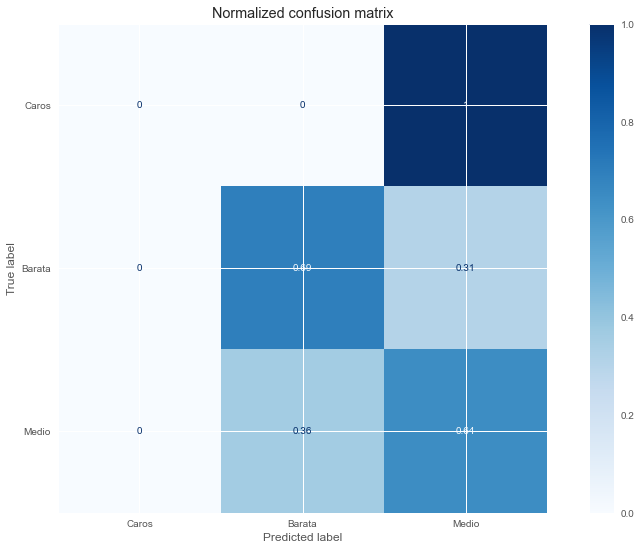

In [89]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svclassifier, X_test, y_test,
                                 display_labels=["Caros", "Barata", "Medio"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

# Interpretacion de las matrices de confusion
Se dibujaron dos matrices una con porcentajes en cada uno de los casos y la otra con el numero exacto.
Como podemos ver en los caros se predijeron de pesima manera solo fueron 4 y el 100% se pensaba que serian medias.
Los baratas tuvieron un acierto del 69% y se confundieron con los medias los falsos positivos.
En cuanto a los medias se tuvo resultados parecidos pero se confundieron con los barata tieniendo 64% de exito.

# Sigmoid Kernel

## Entrenaremos el modelo

In [98]:
svclassifierSigmoid = svm.SVC(kernel='sigmoid')
timestamp1 = time.time()
svclassifierSigmoid.fit(X_train, y_train)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir" % (timestamp2 - timestamp1))
cm = confusion_matrix(y_test,y_pred)

Se tomo  0.01 segundos en predecir


## Realizando predicciones


In [99]:
timestamp1 = time.time()
y_pred = svclassifierSigmoid.predict(X_test)
timestamp2 = time.time()
print("Se tomo  %.2f segundos en predecir" % (timestamp2 - timestamp1))
cm = confusion_matrix(y_test,y_pred)

Se tomo  0.00 segundos en predecir


In [100]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas con valor barato\n',cm)
print('Accuracy: ',accuracy)
y_test

Matriz de confusión para detectar casas con valor barato
 [[ 0  3  1]
 [ 0 34 25]
 [ 1 31 13]]
Accuracy:  0.4351851851851852


439     2
1303    1
1412    2
737     1
315     1
       ..
585     1
247     2
1438    2
433     1
227     2
Name: category, Length: 108, dtype: int64

# Resultados de SVM con un Kernel sigmoid
Tuvo muy mal % de acierto podemos ver que tuvo un 43.51 de acierto

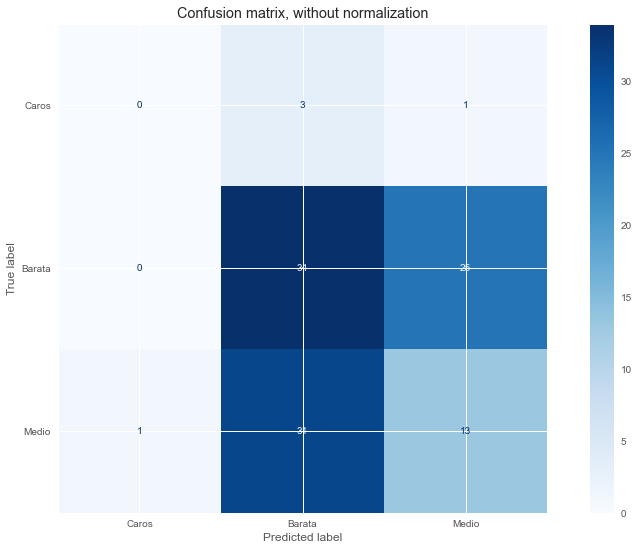

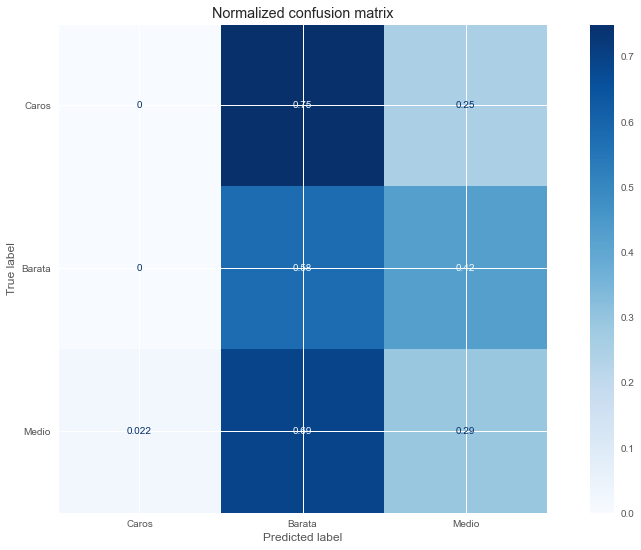

In [101]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svclassifierSigmoid, X_test, y_test,
                                 display_labels=["Caros", "Barata", "Medio"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)


# Interpretacion de las matrices de confusion
A diferencia de las otras dos aca donde mas exito tuvo fue en las casas caras con un 75% de acierto y confundiendose de nuevo con las medias. Probablemete se deba de mejorar la vairable categorica en cuanto a su criterio.
Vimos que lo peores resultados fueron las bartas practicamente solo acertando la mitad un poquito mas pero tuvo un acierto del 58%. Y el peor escenario se lo llevo las medias con un 29% de acierto teniendo mas que todo creyendo que eran baratas como un falso positivo

# Resumen
Lo primero a realizarse furon las transformaciones necesarias para que nuestro modelo funcionara y fuera preciso, para esto se eliminaron las filas con valores nulos y cualquier variable que no fuese cuantitativa, seguido se realizo el pre-procesamiento de datos, donde se seteo nuestra variable categorica para SalePrice. Con el dataset ya listo, se procedió a crear nuestros tres modelos de SVM. El primer modelo se corrió con kernel linear, el segundo con kernel polinomial y el tercero con kernel sigmoidal.

# Cual se tardo mas?
De nuestros 3 modelos el que más tiempo se tomó y por mucho fue el SVM con kernel lineal manejando un tiempo de entrenamiento de 25.58 segundos. Aún así uso un tiempo muy similar para la predicción comparado con los otros dos modelos.

# ¿Cuál se equivocó más?
El modelo SVM con kernel sigmoidal fue el que obtuvo la precisión más baja con una puntuación del 43.51% quedando casi un 21% de precisión por debajo del modelo con kernel polinomial.

# ¿Cuál se equivocó menos? y ¿por qué?
Pese a tener el tiempo de entrenamiento más tardado con creces, el modelo SVM con kernel lineal fue el más preciso alcanzando una precisión del 91.66% con un excedente en precisión de 21.86% por encima del modelo polinomial (segundo más preciso), se cree que la precisión viene de un mayor tiempo de entrenamiento
